In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")
from pandas_profiling import ProfileReport as pr
from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()

In [54]:
df = pd.read_csv("Train.csv")
df

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0      -0.276515  -0.424429   1.344997  -0.012283   0.076230   1.076648   
1       0.853573   0.150991   0.503892  -0.979179  -0.569351  -0.411453   
2       0.947747  -0.173832   1.825628  -0.703478   0.076230  -0.411453   
3       0.853573  -0.381404   0.984523  -0.039464  -0.569351  -0.411453   
4       1.324443   1.590527  -1.178318  -0.097711  -0.246560  -0.411453   
...          ...        ...        ...        ...        ...        ...   
33903   1.701139  -0.248387  -0.457371  -0.792789  -0.569351   4.851829   
33904   1.512791  -0.433625  -1.298476  -0.823854  -0.569351  -0.411453   
33905   0.006007  -0.395526   0.984523  -0.555919  -0.246560  -0.411453   
33906  -0.088167   0.789143   0.503892  -0.664647  -0.246560  -0.411453   
33907   0.947747  -0.406365  -0.938003  -0.606400  -0.246560  -0.411453   

       feature_6  feature_7  feature_8  feature_9  feature_10  feature_11  \
0       0.182198          3          0          1           0           0   
1      -0.251940          4          1          2           0           1   
2      -0.251940          6          1          2           0           0   
3      -0.251940          4          0          2           0           1   
4      -0.251940          0          1          1           0           0   
...          ...        ...        ...        ...         ...         ...   
33903   0.616335          5          0          0           0           0   
33904  -0.251940         10          1          2           0           0   
33905  -0.251940          0          1          1           0           1   
33906  -0.251940          1          1          1           0           1   
33907  -0.251940          1          1          3           0           1   

       feature_12  feature_13  feature_14  feature_15  labels  
0               0           0          10           2       1  
1               0           0           0           3       0  
2               0           0           5           3       0  
3               0           0           5           3       0  
4               0           0           8           3       0  
...           ...         ...         ...         ...     ...  
33903           0           2          10           0       0  
33904           0           2           8           3       0  
33905           0           0           7           3       0  
33906           0           0           9           3       0  
33907           0           2           8           3       0  

[33908 rows x 17 columns]

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33908 entries, 0 to 33907
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_0   33908 non-null  float64
 1   feature_1   33908 non-null  float64
 2   feature_2   33908 non-null  float64
 3   feature_3   33908 non-null  float64
 4   feature_4   33908 non-null  float64
 5   feature_5   33908 non-null  float64
 6   feature_6   33908 non-null  float64
 7   feature_7   33908 non-null  int64  
 8   feature_8   33908 non-null  int64  
 9   feature_9   33908 non-null  int64  
 10  feature_10  33908 non-null  int64  
 11  feature_11  33908 non-null  int64  
 12  feature_12  33908 non-null  int64  
 13  feature_13  33908 non-null  int64  
 14  feature_14  33908 non-null  int64  
 15  feature_15  33908 non-null  int64  
 16  labels      33908 non-null  int64  
dtypes: float64(7), int64(10)
memory usage: 4.4 MB


In [33]:
round(df.isna().sum() * 100 / len(df) , 2).sort_values(ascending = False)

feature_0     0.0
feature_9     0.0
feature_15    0.0
feature_14    0.0
feature_13    0.0
feature_12    0.0
feature_11    0.0
feature_10    0.0
feature_8     0.0
feature_1     0.0
feature_7     0.0
feature_6     0.0
feature_5     0.0
feature_4     0.0
feature_3     0.0
feature_2     0.0
labels        0.0
dtype: float64

In [55]:
tt = pd.read_csv("Test.csv")
tt

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0       0.571051   0.406843   0.984523   0.011016  -0.569351  -0.411453   
1      -1.124080  -0.166935   0.503892  -0.322932   0.721811   0.547323   
2       0.476877   0.145079  -0.577529  -0.691828  -0.246560  -0.411453   
3       1.606965  -0.447419   1.825628  -0.983062   7.177616  -0.411453   
4      -0.935732  -0.364653  -1.178318  -0.322932   0.076230  -0.411453   
...          ...        ...        ...        ...        ...        ...   
11298  -0.464863  -0.507195  -0.938003  -0.928699   1.044601   2.634659   
11299   1.512791  -0.439865   1.825628  -0.905400   1.690181  -0.411453   
11300  -0.559037   0.369073   1.104681   0.026549  -0.569351  -0.411453   
11301  -0.653211  -0.440522   0.143418   0.286718  -0.569351   3.054123   
11302  -0.935732  -0.080556   1.465155   0.317782   0.076230  -0.411453   

       feature_6  feature_7  feature_8  feature_9  feature_10  feature_11  \
0      -0.251940          0          1          1           0           0   
1       0.182198          0          2          1           0           0   
2      -0.251940          0          1          1           0           0   
3      -0.251940          1          1          0           0           1   
4      -0.251940          8          2          1           0           1   
...          ...        ...        ...        ...         ...         ...   
11298   4.523577          7          1          1           0           1   
11299  -0.251940          1          1          0           0           1   
11300  -0.251940          4          2          2           0           1   
11301   1.050473          0          1          1           0           0   
11302  -0.251940          1          1          1           0           1   

       feature_12  feature_13  feature_14  feature_15  
0               0           0          11           3  
1               0           0           5           1  
2               0           0           1           3  
3               0           0           5           3  
4               0           2           8           3  
...           ...         ...         ...         ...  
11298           1           0           8           1  
11299           0           1           5           3  
11300           0           0           8           3  
11301           0           0           0           0  
11302           0           2           8           3  

[11303 rows x 16 columns]

In [35]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11303 entries, 0 to 11302
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_0   11303 non-null  float64
 1   feature_1   11303 non-null  float64
 2   feature_2   11303 non-null  float64
 3   feature_3   11303 non-null  float64
 4   feature_4   11303 non-null  float64
 5   feature_5   11303 non-null  float64
 6   feature_6   11303 non-null  float64
 7   feature_7   11303 non-null  int64  
 8   feature_8   11303 non-null  int64  
 9   feature_9   11303 non-null  int64  
 10  feature_10  11303 non-null  int64  
 11  feature_11  11303 non-null  int64  
 12  feature_12  11303 non-null  int64  
 13  feature_13  11303 non-null  int64  
 14  feature_14  11303 non-null  int64  
 15  feature_15  11303 non-null  int64  
dtypes: float64(7), int64(9)
memory usage: 1.4 MB


In [36]:
round(tt.isna().sum() * 100 / len(tt) , 2).sort_values(ascending = False)

feature_0     0.0
feature_1     0.0
feature_2     0.0
feature_3     0.0
feature_4     0.0
feature_5     0.0
feature_6     0.0
feature_7     0.0
feature_8     0.0
feature_9     0.0
feature_10    0.0
feature_11    0.0
feature_12    0.0
feature_13    0.0
feature_14    0.0
feature_15    0.0
dtype: float64

In [8]:
pr(df)

Summarize dataset:   0%|          | 0/30 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [37]:
cats = ["feature_8" , "feature_9" , "feature_10" , "feature_11" , "feature_12" , "feature_13" , "feature_14"]

In [56]:
df = df.append(tt , ignore_index = True , sort = False)

In [57]:
df_1 = df.copy()

In [74]:
df = df_1.copy()

In [75]:
skew = df.skew()
skew

feature_0      0.684818
feature_1      8.360308
feature_2      0.093079
feature_3      3.144318
feature_4      4.898650
feature_5      2.615715
feature_6     41.846454
feature_7      0.261755
feature_8     -0.102826
feature_9      0.197275
feature_10     7.245375
feature_11    -0.224766
feature_12     1.852617
feature_13     0.769381
feature_14    -0.480272
feature_15    -1.973561
labels         2.383383
dtype: float64

feature_1 with skewness of    8.360308326166326


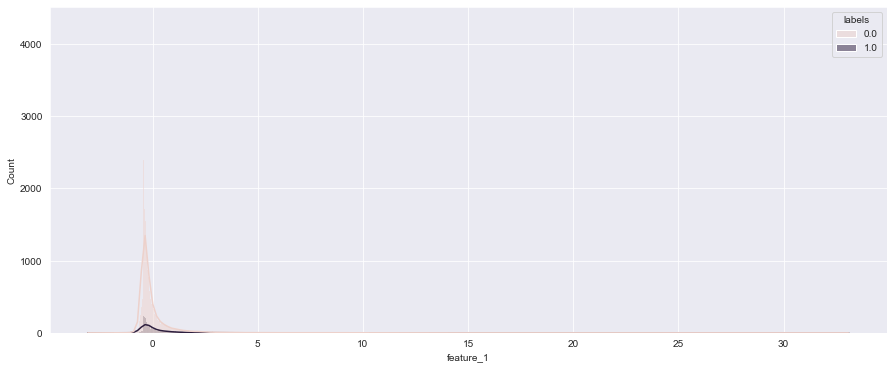

feature_3 with skewness of    3.144318099423456


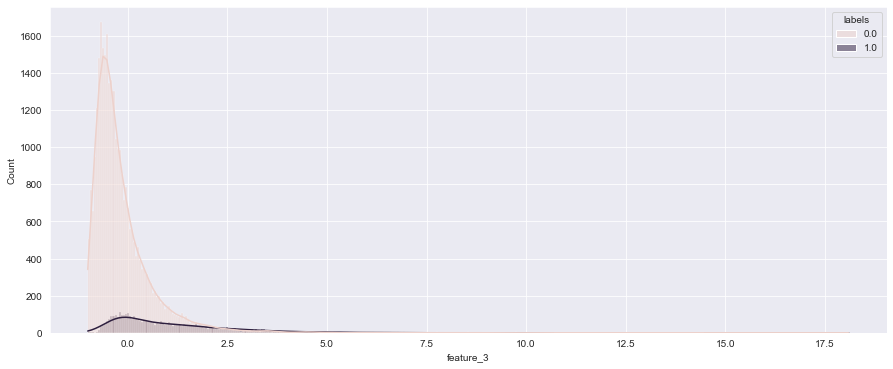

feature_4 with skewness of    4.898650166179674


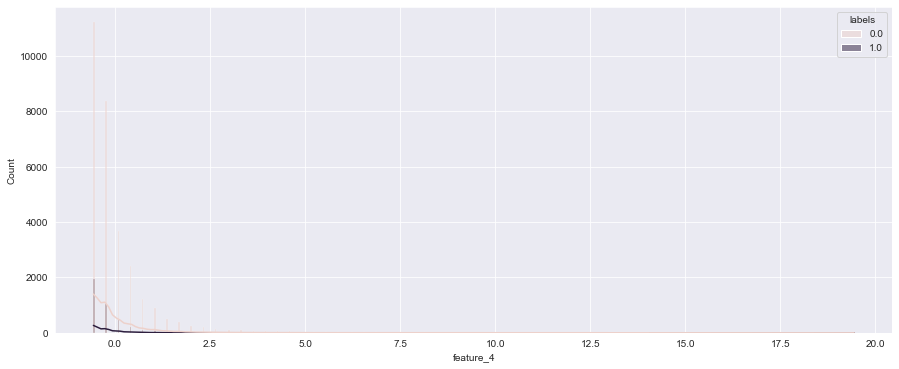

feature_6 with skewness of   41.846454472662934


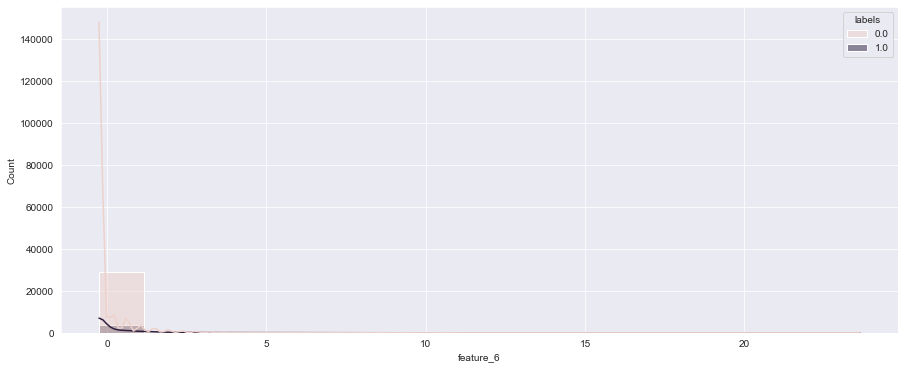

Wall time: 11.1 s


In [71]:
%%time

for i in range(len(skew)):
    if df.columns[i] in ints :
        if skew[i] > 3 or skew[i] < -3 :
            print(f"{skew.index[i]} with skewness of {skew[i] : >{20}}")
            plt.figure(figsize = (15 , 6))
            sns.histplot(data = df , x = df.columns[i] , hue = "labels" , kde = True)
            plt.show()

In [76]:
outs = ["feature_1" , "feature_3" , "feature_4" , "feature_6"]

for i in outs:
    df[i].loc[df[i] > np.percentile(df[i] , [99])[0] * 3] = np.percentile(df[i] , [99])[0] * 3

In [77]:
df.skew()

feature_0     0.684818
feature_1     5.439059
feature_2     0.093079
feature_3     3.027176
feature_4     4.636888
feature_5     2.615715
feature_6     6.138522
feature_7     0.261755
feature_8    -0.102826
feature_9     0.197275
feature_10    7.245375
feature_11   -0.224766
feature_12    1.852617
feature_13    0.769381
feature_14   -0.480272
feature_15   -1.973561
labels        2.383383
dtype: float64

In [78]:
te = df[["feature_0" , "feature_1" , "feature_2" , "feature_3" , "feature_4" , "feature_5" , "feature_6"]]
te

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0      -0.276515  -0.424429   1.344997  -0.012283   0.076230   1.076648   
1       0.853573   0.150991   0.503892  -0.979179  -0.569351  -0.411453   
2       0.947747  -0.173832   1.825628  -0.703478   0.076230  -0.411453   
3       0.853573  -0.381404   0.984523  -0.039464  -0.569351  -0.411453   
4       1.324443   1.590527  -1.178318  -0.097711  -0.246560  -0.411453   
...          ...        ...        ...        ...        ...        ...   
45206  -0.464863  -0.507195  -0.938003  -0.928699   1.044601   2.634659   
45207   1.512791  -0.439865   1.825628  -0.905400   1.690181  -0.411453   
45208  -0.559037   0.369073   1.104681   0.026549  -0.569351  -0.411453   
45209  -0.653211  -0.440522   0.143418   0.286718  -0.569351   3.054123   
45210  -0.935732  -0.080556   1.465155   0.317782   0.076230  -0.411453   

       feature_6  
0       0.182198  
1      -0.251940  
2      -0.251940  
3      -0.251940  
4      -0.251940  
...          ...  
45206   4.523577  
45207  -0.251940  
45208  -0.251940  
45209   1.050473  
45210  -0.251940  

[45211 rows x 7 columns]

In [79]:
te.mean(axis = 1)

0        0.280978
1       -0.100495
2        0.186986
3        0.026355
4        0.104141
           ...   
45206    0.766297
45207    0.431420
45208   -0.041640
45209    0.410236
45210    0.025641
Length: 45211, dtype: float64

In [80]:
te.std(axis = 1)

0        0.672223
1        0.639051
2        0.889764
3        0.632056
4        0.991594
           ...   
45206    2.105570
45207    1.184715
45208    0.607530
45209    1.310267
45210    0.748746
Length: 45211, dtype: float64

In [81]:
te.median(axis = 1)

0        0.076230
1       -0.251940
2       -0.173832
3       -0.251940
4       -0.246560
           ...   
45206   -0.464863
45207   -0.251940
45208   -0.251940
45209    0.143418
45210   -0.080556
Length: 45211, dtype: float64

In [82]:
df["feature_mean"] = te.mean(axis = 1)
df["feature_median"] = te.median(axis = 1)
df["feature_std"] = te.std(axis = 1)

In [83]:
df_2 = df.copy()

In [84]:
df

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0      -0.276515  -0.424429   1.344997  -0.012283   0.076230   1.076648   
1       0.853573   0.150991   0.503892  -0.979179  -0.569351  -0.411453   
2       0.947747  -0.173832   1.825628  -0.703478   0.076230  -0.411453   
3       0.853573  -0.381404   0.984523  -0.039464  -0.569351  -0.411453   
4       1.324443   1.590527  -1.178318  -0.097711  -0.246560  -0.411453   
...          ...        ...        ...        ...        ...        ...   
45206  -0.464863  -0.507195  -0.938003  -0.928699   1.044601   2.634659   
45207   1.512791  -0.439865   1.825628  -0.905400   1.690181  -0.411453   
45208  -0.559037   0.369073   1.104681   0.026549  -0.569351  -0.411453   
45209  -0.653211  -0.440522   0.143418   0.286718  -0.569351   3.054123   
45210  -0.935732  -0.080556   1.465155   0.317782   0.076230  -0.411453   

       feature_6  feature_7  feature_8  feature_9  feature_10  feature_11  \
0       0.182198          3          0          1           0           0   
1      -0.251940          4          1          2           0           1   
2      -0.251940          6          1          2           0           0   
3      -0.251940          4          0          2           0           1   
4      -0.251940          0          1          1           0           0   
...          ...        ...        ...        ...         ...         ...   
45206   4.523577          7          1          1           0           1   
45207  -0.251940          1          1          0           0           1   
45208  -0.251940          4          2          2           0           1   
45209   1.050473          0          1          1           0           0   
45210  -0.251940          1          1          1           0           1   

       feature_12  feature_13  feature_14  feature_15  labels  feature_mean  \
0               0           0          10           2     1.0      0.280978   
1               0           0           0           3     0.0     -0.100495   
2               0           0           5           3     0.0      0.186986   
3               0           0           5           3     0.0      0.026355   
4               0           0           8           3     0.0      0.104141   
...           ...         ...         ...         ...     ...           ...   
45206           1           0           8           1     NaN      0.766297   
45207           0           1           5           3     NaN      0.431420   
45208           0           0           8           3     NaN     -0.041640   
45209           0           0           0           0     NaN      0.410236   
45210           0           2           8           3     NaN      0.025641   

       feature_median  feature_std  
0            0.076230     0.672223  
1           -0.251940     0.639051  
2           -0.173832     0.889764  
3           -0.251940     0.632056  
4           -0.246560     0.991594  
...               ...          ...  
45206       -0.464863     2.105570  
45207       -0.251940     1.184715  
45208       -0.251940     0.607530  
45209        0.143418     1.310267  
45210       -0.080556     0.748746  

[45211 rows x 20 columns]

In [85]:
ints = list(set(df.columns.tolist()) - set(cats))
ints.remove("labels")
ints

['feature_15',
 'feature_4',
 'feature_mean',
 'feature_3',
 'feature_0',
 'feature_6',
 'feature_2',
 'feature_median',
 'feature_std',
 'feature_5',
 'feature_7',
 'feature_1']

<AxesSubplot:>

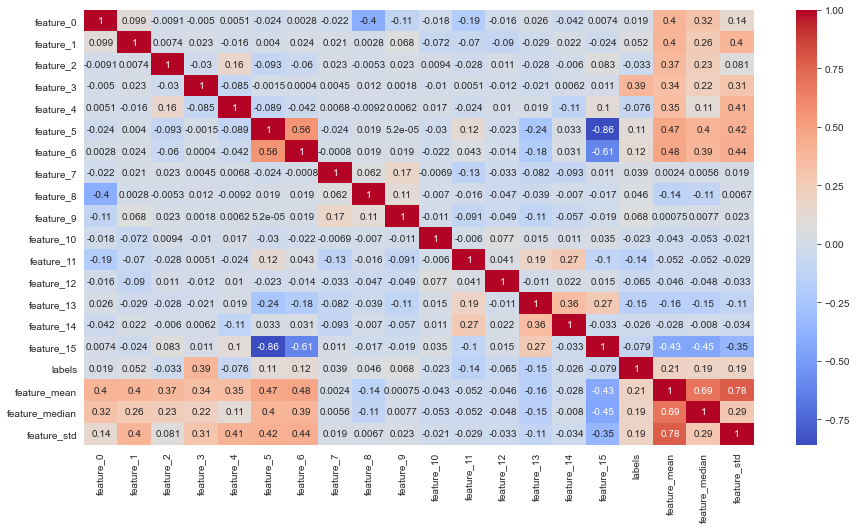

In [86]:
plt.figure(figsize = (15 , 8))
sns.heatmap(df.corr() , annot = True , cmap = "coolwarm")

In [89]:
tt = df[df["labels"].isnull() == True]
df = df[df["labels"].isnull() != True]
tt.drop("labels", axis = 1 , inplace = True)

In [90]:
X = df.drop(["labels"] , axis = 1)
y = df["labels"]

In [103]:
y.value_counts()

0.0    29941
1.0     3967
Name: labels, dtype: int64

In [91]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(27126, 6782, 27126, 6782)

In [116]:
y_train.value_counts()

0.0    23956
1.0     3170
Name: labels, dtype: int64

In [92]:
ints

['feature_15',
 'feature_4',
 'feature_mean',
 'feature_3',
 'feature_0',
 'feature_6',
 'feature_2',
 'feature_median',
 'feature_std',
 'feature_5',
 'feature_7',
 'feature_1']

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[ints] = scaler.fit_transform(X_train[ints])
X_test[ints] = scaler.transform(X_test[ints])
tt[ints] = scaler.transform(tt[ints])

In [94]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix , f1_score , accuracy_score , classification_report , log_loss
from sklearn.model_selection import cross_val_score

In [95]:
models = []
models.append(("Logestic Regression" , LogisticRegression(solver = "liblinear")))
models.append(("XGBClassifier", XGBClassifier(objective = "binary:logistic" , random_state = 42 , eval_metric='mlogloss')))
models.append(("CatBoostClassifier", CatBoostClassifier(random_state = 42 , verbose = 0)))
models.append(("LightGBM" , LGBMClassifier(random_state = 42 , n_estimators = 200)))
models.append(("Extra Tree Classifier", ExtraTreesClassifier(random_state = 42 , n_estimators = 200)))
models.append(("Bagging Classifier", BaggingClassifier(random_state = 42 , n_estimators = 200)))
models.append(("Gradient Boosting Classifier" , GradientBoostingClassifier(random_state = 42 , n_estimators = 200)))
models.append(("RandomForest", RandomForestClassifier(random_state = 42 , n_estimators = 200)))

In [99]:

def evaluation_metrics(model , X_train , y_train , X_test , y_test , params = False):
    
    mod = model[1].fit(X_train , y_train)
    preds = model[1].predict(X_test)
    accuracies = cross_val_score(estimator = model[1], X = X_train , y = y_train, cv = 5 , scoring = "f1")
    cm = confusion_matrix(y_test , preds)
    cf = classification_report(y_test , preds)
    score = 100 * (f1_score(y_test , preds))
    
    
    print("\n")
    print(model[0])
    
    print("\n")
    if params:
        print(f"Best Parameters are : \n" , model[1].best_params_)
        print("\n")
        
    print(f"Confusion matrix : \n")
    plt.figure(figsize = (10 , 6))
    sns.heatmap(cm, cmap = 'coolwarm', annot = True, annot_kws = {'fontsize': 20})
    plt.show()
    print("\n")
    
    print(f"Training score : {model[1].score(X_train , y_train):.4f}")
    print("\n") 
    
    print(f"Test Score : {model[1].score(X_test , y_test):.4f}")
    print("\n")
    
    print(f"K-fold accuracy : {np.mean(accuracies):.4f}")
    print("\n")
    
    print(f"Standard Deviation of Accuracies in k-fold : {np.std(accuracies):.4f}")
    print("\n")
    
    print(f"Classification report : \n\n{cf}")
    print("\n")
    
    print(f"Evaluation Score : {score}")
    print("\n")

    print("\n\n")
    
    sam = []
    sam.append(model[0])
    sam.append(model[1].score(X_train , y_train))
    sam.append(model[1].score(X_test , y_test))
    sam.append(np.mean(accuracies))
    sam.append(np.std(accuracies))
    sam.append(score)
    
    return sam , mod



Logestic Regression


Confusion matrix : 



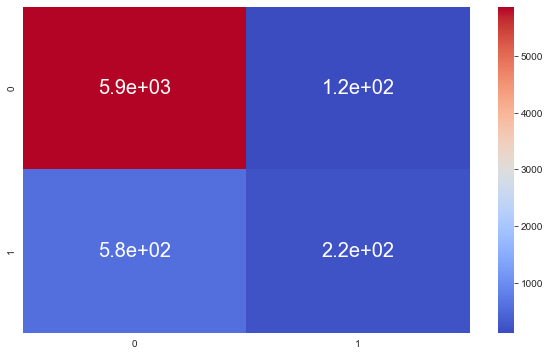



Training score : 0.8905


Test Score : 0.8978


K-fold accuracy : 0.3192


Standard Deviation of Accuracies in k-fold : 0.0217


Classification report : 

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94      5985
         1.0       0.66      0.27      0.39       797

    accuracy                           0.90      6782
   macro avg       0.78      0.63      0.67      6782
weighted avg       0.88      0.90      0.88      6782



Evaluation Score : 38.726790450928384







XGBClassifier


Confusion matrix : 



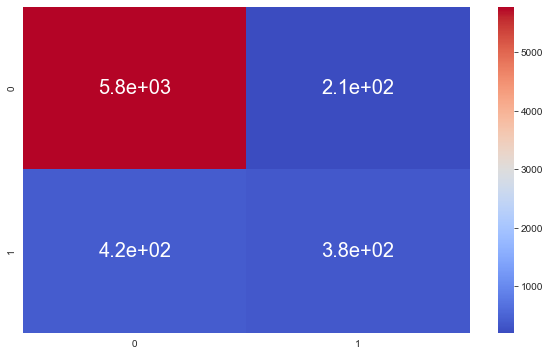



Training score : 0.9667


Test Score : 0.9078


K-fold accuracy : 0.5255


Standard Deviation of Accuracies in k-fold : 0.0095


Classification report : 

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      5985
         1.0       0.65      0.48      0.55       797

    accuracy                           0.91      6782
   macro avg       0.79      0.72      0.75      6782
weighted avg       0.90      0.91      0.90      6782



Evaluation Score : 54.87364620938629







CatBoostClassifier


Confusion matrix : 



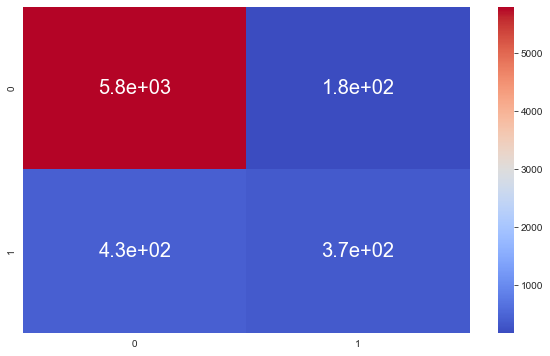



Training score : 0.9519


Test Score : 0.9099


K-fold accuracy : 0.5344


Standard Deviation of Accuracies in k-fold : 0.0120


Classification report : 

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      5985
         1.0       0.67      0.46      0.55       797

    accuracy                           0.91      6782
   macro avg       0.80      0.72      0.75      6782
weighted avg       0.90      0.91      0.90      6782



Evaluation Score : 54.5724907063197







LightGBM


Confusion matrix : 



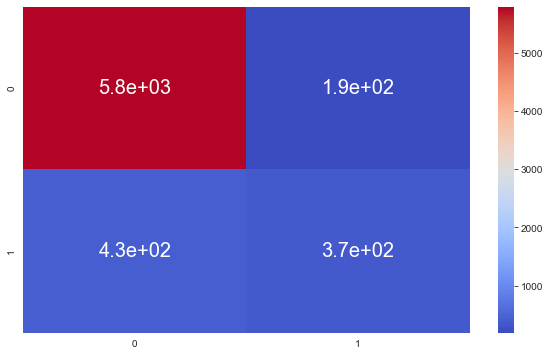



Training score : 0.9605


Test Score : 0.9089


K-fold accuracy : 0.5349


Standard Deviation of Accuracies in k-fold : 0.0072


Classification report : 

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      5985
         1.0       0.66      0.46      0.54       797

    accuracy                           0.91      6782
   macro avg       0.80      0.72      0.75      6782
weighted avg       0.90      0.91      0.90      6782



Evaluation Score : 54.4918998527246







Extra Tree Classifier


Confusion matrix : 



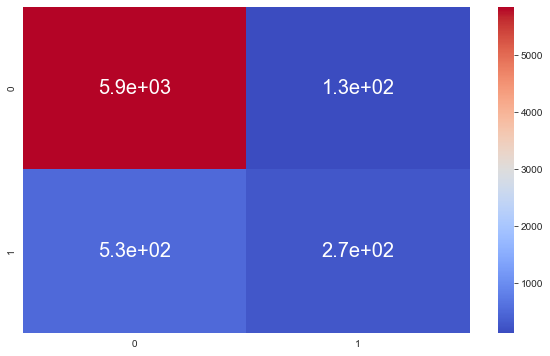



Training score : 1.0000


Test Score : 0.9028


K-fold accuracy : 0.4400


Standard Deviation of Accuracies in k-fold : 0.0210


Classification report : 

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      5985
         1.0       0.67      0.34      0.45       797

    accuracy                           0.90      6782
   macro avg       0.79      0.66      0.70      6782
weighted avg       0.89      0.90      0.89      6782



Evaluation Score : 45.03753127606338







Bagging Classifier


Confusion matrix : 



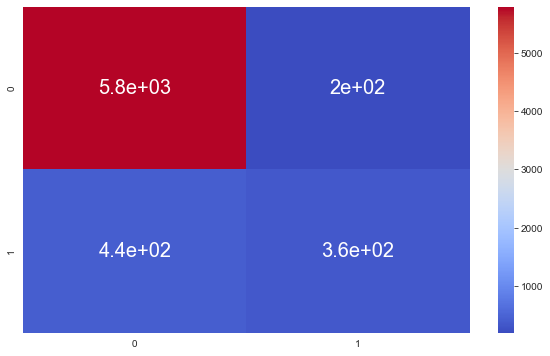



Training score : 1.0000


Test Score : 0.9065


K-fold accuracy : 0.5117


Standard Deviation of Accuracies in k-fold : 0.0152


Classification report : 

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      5985
         1.0       0.65      0.45      0.53       797

    accuracy                           0.91      6782
   macro avg       0.79      0.71      0.74      6782
weighted avg       0.90      0.91      0.90      6782



Evaluation Score : 53.2448377581121







Gradient Boosting Classifier


Confusion matrix : 



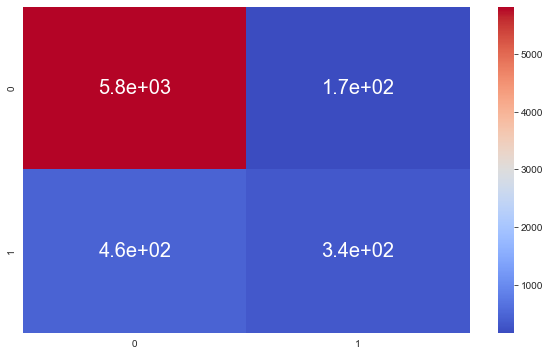



Training score : 0.9179


Test Score : 0.9071


K-fold accuracy : 0.4999


Standard Deviation of Accuracies in k-fold : 0.0145


Classification report : 

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      5985
         1.0       0.67      0.42      0.52       797

    accuracy                           0.91      6782
   macro avg       0.80      0.70      0.73      6782
weighted avg       0.90      0.91      0.90      6782



Evaluation Score : 51.53846153846155







RandomForest


Confusion matrix : 



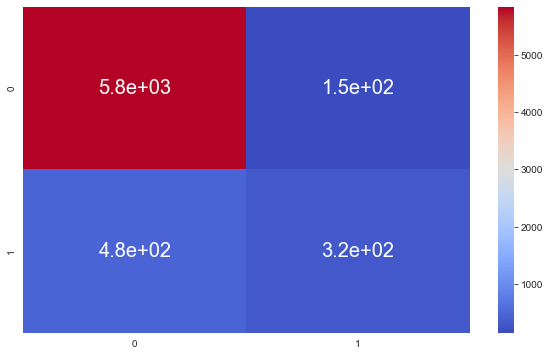



Training score : 1.0000


Test Score : 0.9075


K-fold accuracy : 0.4795


Standard Deviation of Accuracies in k-fold : 0.0264


Classification report : 

              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      5985
         1.0       0.68      0.40      0.50       797

    accuracy                           0.91      6782
   macro avg       0.80      0.69      0.73      6782
weighted avg       0.90      0.91      0.90      6782



Evaluation Score : 50.27755749405234





Wall time: 6min 8s


In [100]:
%%time

pre_final = []

for i in models:
    sam = evaluation_metrics(i , X_train , y_train , X_test , y_test)
    pre_final.append(sam)

In [101]:
data_pre_final = [x[0] for x in pre_final]

In [102]:
me = pd.DataFrame(data_pre_final , columns = ["Model" , "Train Score" , "Test Score" , "K-fold Accuracy" , "K-fold Std" , "Evaluation_Score"])

me.sort_values(by = ["Evaluation_Score" , "K-fold Std" , "K-fold Accuracy" , "Test Score" , "Train Score"] , inplace = True , ascending = [False , True , False , False , False])
me = me.reset_index(drop = True)
me

Model  Train Score  Test Score  K-fold Accuracy  \
0                 XGBClassifier     0.966674    0.907844         0.525517   
1            CatBoostClassifier     0.951891    0.909909         0.534399   
2                      LightGBM     0.960518    0.908876         0.534861   
3            Bagging Classifier     1.000000    0.906517         0.511727   
4  Gradient Boosting Classifier     0.917865    0.907107         0.499879   
5                  RandomForest     1.000000    0.907549         0.479527   
6         Extra Tree Classifier     1.000000    0.902831         0.440049   
7           Logestic Regression     0.890511    0.897818         0.319162   

   K-fold Std  Evaluation_Score  
0    0.009495         54.873646  
1    0.012029         54.572491  
2    0.007172         54.491900  
3    0.015177         53.244838  
4    0.014491         51.538462  
5    0.026421         50.277557  
6    0.020974         45.037531  
7    0.021738         38.726790

In [128]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(class_weights = [0.2 , 0.8] ,
                         eval_metric = "Logloss" ,
                         depth=2,
                         random_seed=42, 
                         iterations=1000, 
                         learning_rate=0.07,
                         leaf_estimation_iterations=1,
                         l2_leaf_reg=1,
                         bootstrap_type='Bayesian', 
                         bagging_temperature=1, 
                         random_strength=1,
                         od_type='Iter', 
                         od_wait=200)
cat.fit(X_train, y_train, verbose=50,
        use_best_model=True,
        eval_set=[(X_train, y_train),(X_test, y_test)],
        plot=False)

0:	learn: 0.6719678	test: 0.6719678	test1: 0.6712599	best: 0.6712599 (0)	total: 5.28ms	remaining: 5.28s
50:	learn: 0.4318767	test: 0.4318767	test1: 0.4209038	best: 0.4209038 (50)	total: 173ms	remaining: 3.22s
100:	learn: 0.3969149	test: 0.3969149	test1: 0.3876365	best: 0.3876365 (100)	total: 334ms	remaining: 2.97s
150:	learn: 0.3790107	test: 0.3790107	test1: 0.3720157	best: 0.3720157 (150)	total: 490ms	remaining: 2.75s
200:	learn: 0.3661919	test: 0.3661919	test1: 0.3617956	best: 0.3617956 (200)	total: 675ms	remaining: 2.68s
250:	learn: 0.3574695	test: 0.3574695	test1: 0.3553509	best: 0.3553509 (250)	total: 848ms	remaining: 2.53s
300:	learn: 0.3507277	test: 0.3507277	test1: 0.3497422	best: 0.3497422 (300)	total: 1.03s	remaining: 2.39s
350:	learn: 0.3463236	test: 0.3463236	test1: 0.3470694	best: 0.3470556 (349)	total: 1.24s	remaining: 2.29s
400:	learn: 0.3415318	test: 0.3415318	test1: 0.3436665	best: 0.3436665 (400)	total: 1.4s	remaining: 2.1s
450:	learn: 0.3376198	test: 0.3376198	test1:

In [129]:
preds = cat.predict(X_test).astype(int)
preds

array([0, 0, 0, ..., 0, 0, 0])

In [130]:
100 * (f1_score(y_test , preds))

60.98294884653962

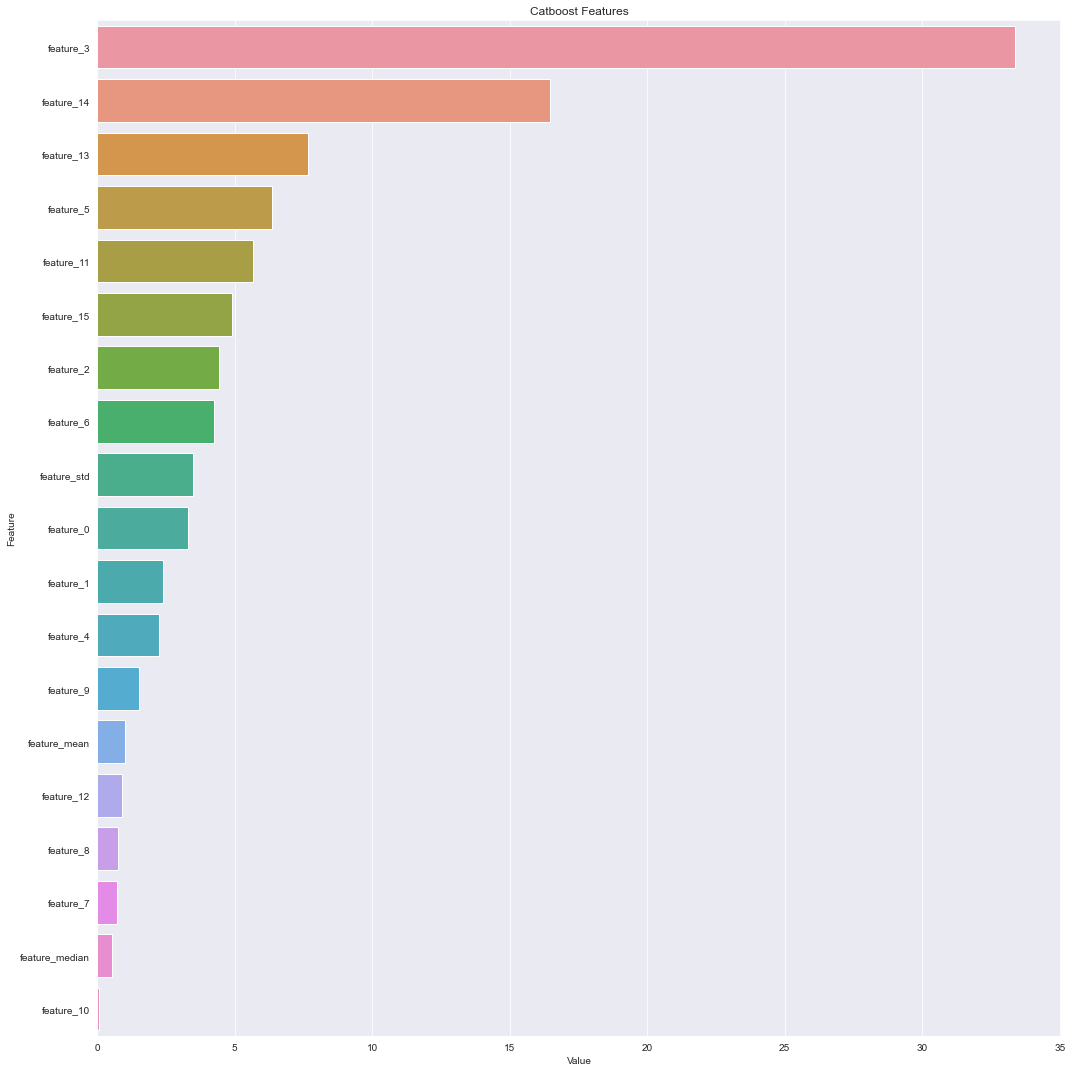

In [131]:
feature_imp = pd.DataFrame(sorted(zip(cat.feature_importances_, X.columns), reverse=True)[:50], 
                           columns=['Value','Feature'])
plt.figure(figsize=(15,15))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Catboost Features')
plt.tight_layout()
plt.show()

In [132]:
final = pd.DataFrame({"labels" : cat.predict(tt)})
final

labels
0         1.0
1         0.0
2         0.0
3         0.0
4         0.0
...       ...
11298     0.0
11299     0.0
11300     0.0
11301     1.0
11302     0.0

[11303 rows x 1 columns]

In [133]:
final.to_csv("Catboost_1.csv" , index = False)

In [143]:
%%time

from sklearn.model_selection import StratifiedKFold


errcat = []
y_pred_totcat = []


fold = StratifiedKFold(n_splits = 10, shuffle = True , random_state = 42)

for train_index, test_index in fold.split(X , y):
    X_tr, X_te = X.loc[train_index], X.loc[test_index]
    y_tr, y_te = y[train_index], y[test_index]
    

    cat = CatBoostClassifier(eval_metric = "Logloss" ,
                             class_weights = [0.2 , 0.8] ,
                             depth=2,
                             random_seed=42, 
                             iterations=1000, 
                             learning_rate=0.07,
                             leaf_estimation_iterations=1,
                             l2_leaf_reg=1,
                             bootstrap_type='Bayesian', 
                             bagging_temperature=1, 
                             random_strength=1,
                             od_type='Iter', 
                             od_wait=200,
                             verbose = False)
    
    cat.fit(X_tr , y_tr)
    y_pred_cat = cat.predict(X_te)
    
    print(f"Evaluation Score : {100 * (f1_score(y_te , y_pred_cat))}")

    errcat.append(100 * (f1_score(y_te , y_pred_cat)))
    p = cat.predict(tt)
    y_pred_totcat.append(p)

Evaluation Score : 63.16872427983539
Evaluation Score : 60.257680872150644
Evaluation Score : 62.1301775147929
Evaluation Score : 59.65250965250966
Evaluation Score : 59.70731707317073
Evaluation Score : 58.964143426294825
Evaluation Score : 60.0
Evaluation Score : 59.39393939393939
Evaluation Score : 59.31558935361216
Evaluation Score : 61.91446028513238
Wall time: 37.5 s


In [147]:
np.mean(errcat , 0)

60.450454185143805

In [149]:
y_pred_totcat

[array([1., 0., 0., ..., 0., 0., 0.]),
 array([1., 0., 0., ..., 0., 1., 0.]),
 array([1., 0., 0., ..., 0., 1., 0.]),
 array([1., 0., 0., ..., 0., 1., 0.]),
 array([1., 0., 0., ..., 0., 1., 0.]),
 array([1., 0., 0., ..., 0., 1., 0.]),
 array([1., 0., 0., ..., 0., 1., 0.]),
 array([1., 0., 0., ..., 0., 1., 0.]),
 array([1., 0., 0., ..., 0., 1., 0.]),
 array([1., 0., 0., ..., 0., 1., 0.])]

In [150]:
stat_cat = pd.DataFrame({"labels" : y_pred_totcat[1]})
stat_cat

labels
0         1.0
1         0.0
2         0.0
3         0.0
4         0.0
...       ...
11298     0.0
11299     0.0
11300     0.0
11301     1.0
11302     0.0

[11303 rows x 1 columns]

In [151]:
stat_cat.to_csv("Cat_1.csv" , index = False)